# 영상파일 처리

- cv2.imread(filename[, flags]) : 지정한 영상파일로부터 영상을 적재한 후, 행렬로 반환
    - filename : 적재할 영상 파일 이름
    - flags : 적재한 영상을 행렬로 반환될 대 컬러 타입을 결정 
        
- cv2.imwrite(filename, img[, params]) : image 행렬을 지정한 영상 파일로 저장
    - filename : 적재할 영상 파일 이름
    - img : 지정하고자 하는 행렬 영상
    - params : 압축 방식에 사용되는 인수 상 (paramid, paramValue)

##### 행렬 컬러 타입 결정 상수 
- cv2.IMREAD_UNCHANGE (값 : -1) - 입력 파일에 저장된 타입의 영상을 그래로 반환 (알파 채널 포함)
- cv2.IMREAD_GRAYSCALE (값 : 0) - 명암도(grayscale) 영상으로 변환하여 반환
- cv2.IMREAD_COLOR (값 : 1) - 컬러 영상으로 변환하여 반환
- cv2.IMREAD_ANYDEPTH (값 : 2) - 입력 파일에 정의된 깊이(DEPTH)에 따라 16비트/32비트 영상으로 변환, 설정되지 않으면 8비트 영상으로 변환
- cv2.IMREAD_ANYCOLOR (값 : 4) - 입력 파일에 정의된 타입의 영상을 반환 

In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
def print_matInfo(name, image):
    if image.dtype == 'uint8':     mat_type = "CV_8U"
    elif image.dtype == 'int8':    mat_type = "CV_8S"
    elif image.dtype == 'uint16':  mat_type = "CV_16U"
    elif image.dtype == 'int16':   mat_type = "CV_16S"
    elif image.dtype == 'float32': mat_type = "CV_32F"
    elif image.dtype == 'float64': mat_type = "CV_64F"
    nchannel = 3 if image.ndim == 3 else 1

    ## depth, channel 출력
    print("%12s: depth(%s), channels(%s) -> mat_type(%sC%d)"
          % (name, image.dtype, nchannel, mat_type,  nchannel))

In [3]:
title1, title2 = "gray2gray", "gray2color"      # 윈도우 이름
gray2gray  = cv2.imread("img/read_gray.jpg", cv2.IMREAD_GRAYSCALE) # 영상 파일 적재
gray2color = cv2.imread("img/read_gray.jpg", cv2.IMREAD_COLOR)

In [4]:
if (gray2gray is None or gray2color is None) :  # 예외처리 -영상 파일 읽기 여부 조사
    raise Exception("영상파일 읽기 에러")

In [5]:
# 행렬 내 한 화소 값 표시
print("행렬 좌표 (100, 100) 화소값")
print("%s %s" % (title1, gray2gray[100, 100]))
print("%s %s\n" % (title2, gray2color[100, 100]))

print_matInfo(title1, gray2gray)
print_matInfo(title2, gray2color)

행렬 좌표 (100, 100) 화소값
gray2gray 106
gray2color [106 106 106]

   gray2gray: depth(uint8), channels(1) -> mat_type(CV_8UC1)
  gray2color: depth(uint8), channels(3) -> mat_type(CV_8UC3)


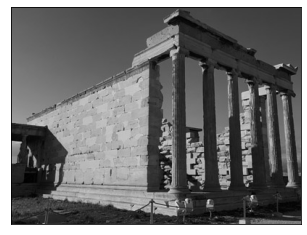

In [6]:
r, g, b = cv2.split(gray2color)
gray2color2 = cv2.merge([r, g, b])
plt.imshow(gray2color2)
plt.xticks([])  
plt.yticks([]) 
plt.show()

실행 결과에서 보듯이 gray2color 행렬은 명암도 영상파일을 3채널 영상으로 만들었기 때문에 BGR 의 모든 채널 값이 동일하다. 따라서 명암도 영상과 같은 색으로 보인다 